In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [75]:
#Sample data, training
#X = np.array(([3,5], [5,1], [10,2]), dtype=float)
#y = np.array(([75], [82], [93]), dtype=float)

X = np.array(([39,13.58],[33,13.33],[82,13.47],[39,13.58],[41,13.67],[8,13.71],[58,13.76],[11,13.84],[37,13.92],[14,14.04]), dtype=float)
y= np.array(([54],[75],[55],[54],[59],[25],[34],[51],[40],[56]), dtype=float)

X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

print (X.shape, y.shape)

(10, 2) (10, 1)


In [77]:
class Neural_Network(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (Parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
        print (self.W1, self.W2)
        
    def forward(self, X):
        #Propagate inputs through network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime (self, X, y):
        #compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
    
    
    ##############################################
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        
        
    def computeNumericalGradient(self, X, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(X, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad

In [78]:
#Structures are fixed thus hyperparameter
#Weights change, part of learning

#Data is moved through a method called forward
##Rather than passing inputs one at a time, matrices can be used to pass inputs.
##faster approach

#matrices be named :: X * W(1) = Z(2)
##Z(2)=activity of second layer.

In [79]:
class trainer(object):
    def __init__(self, N):
        #Making local reference to Neural Network:
        self.N = N
        
    def callbackF(self, params):
        #to see cost function value as being trained
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
 
        
    def costFunctionWrapper(self, params, X, y):
        #Wrapper function to setup obj fn
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X, y)
        return cost, grad
           
        
    def train(self, X, y):
        #make internal variables for callback function:
        self.X = X
        self.y = y
        
        #Make empty list to store costs:
        self.J =[]
        
        params0 = self.N.getParams()
        
        options = {'maxiter' : 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper,
                                 params0, jac = True, 
                                 method='BFGS', 
                                 args = (X,y), 
                                 options=options, 
                                 callback=self.callbackF)
        
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [80]:
NN = Neural_Network()

[[-0.57177544  0.53056554  0.5521368 ]
 [ 1.45739776  0.03083897  0.52347642]] [[ 0.18424642]
 [ 0.24558891]
 [-1.11181866]]


In [81]:
yHat = NN.forward(X)

In [82]:
yHat

array([[ 0.38221289],
       [ 0.38463146],
       [ 0.36817353],
       [ 0.38221289],
       [ 0.38141015],
       [ 0.39310932],
       [ 0.37558019],
       [ 0.39181529],
       [ 0.38247312],
       [ 0.39043007]])

In [83]:
y

array([[ 0.54],
       [ 0.75],
       [ 0.55],
       [ 0.54],
       [ 0.59],
       [ 0.25],
       [ 0.34],
       [ 0.51],
       [ 0.4 ],
       [ 0.56]])

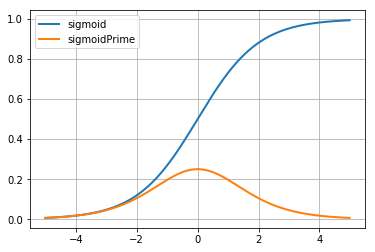

In [84]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])
plt.show()

In [85]:
cost1 = NN.costFunction(X,y)

In [86]:
dJdW1 , dJdW2 = NN.costFunctionPrime(X, y)

In [87]:
dJdW1

array([[-0.00492517, -0.00833393,  0.03289982],
       [-0.00929725, -0.01638098,  0.06540256]])

In [88]:
dJdW2

array([[-0.21316   ],
       [-0.16184754],
       [-0.19369984]])

In [89]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X, y)

In [90]:
print (cost1, cost2)

[ 0.16231666] [ 0.70086399]


In [91]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [92]:
print (cost2, cost3)

[ 0.70086399] [ 0.10837411]


In [93]:
numgrad = NN.computeNumericalGradient(X, y)
numgrad

array([ 0.00568822,  0.00623079, -0.00802646,  0.01560321,  0.01853618,
       -0.02438749,  0.11006954,  0.07590895,  0.08913259])

In [94]:
grad = NN.computeGradients(X,y)
grad

array([ 0.00568822,  0.00623079, -0.00802646,  0.01560321,  0.01853618,
       -0.02438749,  0.11006954,  0.07590895,  0.08913259])

In [95]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)


7.3776705408306568e-10

In [96]:
T = trainer(NN)

In [97]:
T.train(X,y)

         Current function value: 0.027033
         Iterations: 200
         Function evaluations: 226
         Gradient evaluations: 226


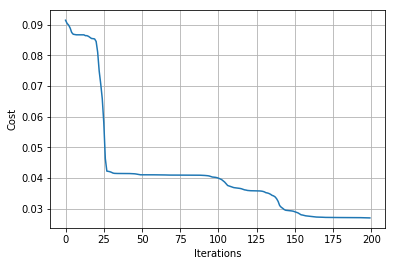

In [98]:
plt.plot(T.J)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

In [99]:
NN.costFunctionPrime(X,y)

(array([[ -5.18438966e-05,   2.28420919e-04,   6.96201510e-06],
        [ -8.07134986e-04,   1.57691328e-03,   2.53694662e-06]]),
 array([[ 0.00103978],
        [ 0.00103113],
        [ 0.00093891]]))

In [100]:
NN.forward(X)

array([[ 0.49321542],
       [ 0.72995032],
       [ 0.49355284],
       [ 0.49321542],
       [ 0.49335159],
       [ 0.262458  ],
       [ 0.49355033],
       [ 0.47097069],
       [ 0.4950199 ],
       [ 0.60973851]])

In [106]:
y

array([[ 0.54],
       [ 0.75],
       [ 0.55],
       [ 0.54],
       [ 0.59],
       [ 0.25],
       [ 0.34],
       [ 0.51],
       [ 0.4 ],
       [ 0.56]])

In [102]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)


#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.


#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [103]:
allOutputs = NN.forward(allInputs)

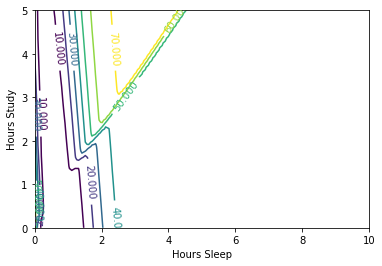

In [104]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.show()

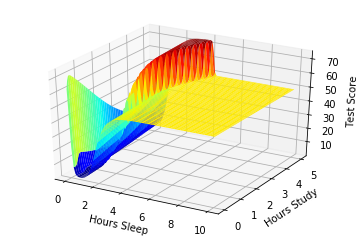

In [105]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=plt.cm.jet)


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')
plt.show()